## Problem2

In this time and age of widespread internet usage, effective and targeted marketing plays a vital role. A marketing company would like to develop a strategy by analyzing their customer data. For this, data like age, location, time of activity, etc. has been collected to determine whether a user will click on an ad or not. Perform Logistic Regression on the given data to predict whether a user will click on an ad or not. 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

#Importing Data
data = pd.read_csv("advertising.csv", sep = ",")


In [25]:
data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0


In [26]:
data.shape

(1000, 10)

In [27]:
data.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Ad_Topic_Line                  object
City                           object
Male                            int64
Country                        object
Timestamp                      object
Clicked_on_Ad                   int64
dtype: object

In [28]:
data['Daily_Time_ Spent _on_Site'].nunique()

900

In [29]:
data['City'].nunique()

969

In [30]:
data['Ad_Topic_Line'].nunique()

1000

In [31]:
data['Country'].nunique()

237

In [32]:
from datetime import datetime
data['datetime'] = pd.to_datetime(data['Timestamp'])
data.dtypes

Daily_Time_ Spent _on_Site           float64
Age                                    int64
Area_Income                          float64
Daily Internet Usage                 float64
Ad_Topic_Line                         object
City                                  object
Male                                   int64
Country                               object
Timestamp                             object
Clicked_on_Ad                          int64
datetime                      datetime64[ns]
dtype: object

In [33]:
#data['datetime'].month()
pd.DatetimeIndex(data['datetime']).year.value_counts()

2016    1000
Name: datetime, dtype: int64

In [34]:
data['month'] = pd.DatetimeIndex(data['datetime']).month

In [35]:
data.drop(['Timestamp','datetime'],axis=1,inplace=True)

In [36]:
data.drop(['Ad_Topic_Line'],axis=1,inplace=True)

In [37]:
data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,Clicked_on_Ad,month
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0,3
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0,4
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0,3
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0,10
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0,3


In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ['City', 'Country']

#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

In [39]:
data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,Clicked_on_Ad,month
0,68.95,35,61833.90,256.09,961,0,215,0,3
1,80.23,31,68441.85,193.77,903,1,147,0,4
2,69.47,26,59785.94,236.50,111,0,184,0,3
3,74.15,29,54806.18,245.89,939,1,103,0,10
4,68.37,35,73889.99,225.58,805,0,96,0,3


In [40]:
data['Clicked_Ad'] = data['Clicked_on_Ad']

In [42]:
data.drop(['Clicked_on_Ad'],axis=1,inplace=True)

In [43]:
data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,month,Clicked_Ad
0,68.95,35,61833.90,256.09,961,0,215,3,0
1,80.23,31,68441.85,193.77,903,1,147,4,0
2,69.47,26,59785.94,236.50,111,0,184,3,0
3,74.15,29,54806.18,245.89,939,1,103,10,0
4,68.37,35,73889.99,225.58,805,0,96,3,0


In [17]:
data.dtypes


Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
City                            int32
Male                            int64
Country                         int32
Clicked_on_Ad                   int64
month                           int64
dtype: object

In [53]:
data.iloc[:,0:8]

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,month
0,68.95,35,61833.90,256.09,961,0,215,3
1,80.23,31,68441.85,193.77,903,1,147,4
2,69.47,26,59785.94,236.50,111,0,184,3
3,74.15,29,54806.18,245.89,939,1,103,10
4,68.37,35,73889.99,225.58,805,0,96,3
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,126,1,116,11
996,51.30,45,67782.17,134.42,488,1,26,4
997,51.63,51,42415.72,120.37,798,1,140,1
998,55.55,19,41920.79,187.95,935,0,85,3


In [55]:
X

array([[ 0.24926659, -0.11490498,  0.50969109, ..., -0.96269532,
         1.42457152, -0.64861166],
       [ 0.96113227, -0.57042523,  1.00253021, ...,  1.03875025,
         0.45187483, -0.30342185],
       [ 0.28208309, -1.13982553,  0.35694859, ..., -0.96269532,
         0.98113627, -0.64861166],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, ...,  1.03875025,
         0.35174429, -1.33899129],
       [-0.59638946, -1.93698596, -0.97548353, ..., -0.96269532,
        -0.43499568, -0.64861166],
       [-1.26155474, -1.13982553, -1.87383208, ..., -0.96269532,
        -1.25034438, -0.64861166]])

<AxesSubplot:>

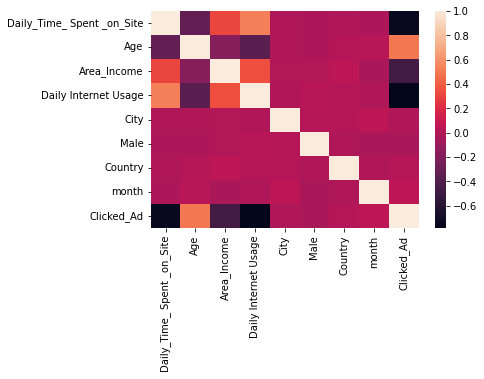

In [57]:
# check correlations in train data with a heatmap
sns.heatmap(data.corr())

In [58]:
data.var()

Daily_Time_ Spent _on_Site    2.513371e+02
Age                           7.718611e+01
Area_Income                   1.799524e+08
Daily Internet Usage          1.927415e+03
City                          7.801495e+04
Male                          2.498889e-01
Country                       4.892124e+03
month                         8.400760e+00
Clicked_Ad                    2.502503e-01
dtype: float64

In [59]:
data[data.duplicated()]

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,month,Clicked_Ad


In [54]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()


In [63]:
X = trans.fit_transform(data.iloc[:,0:8])
y = data.iloc[:,8]

In [56]:
X.shape

(1000, 8)

In [64]:
y.shape

(1000,)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Classifier

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


RF train roc-auc: 1.0
RF test roc-auc: 0.9897327833572453


### Logistic Classifier

In [68]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_logistic = log_classifier.decision_function(X_test)

Logistic train roc-auc: 0.9939740319204604
Logistic test roc-auc: 0.9924228837876614


### Adaboost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_adaboost = ada_classifier.decision_function(X_test)

Adaboost train roc-auc: 0.9999018838304552
Adaboost test roc-auc: 0.9844870875179341


### KNN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('knn train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('knn test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

knn train roc-auc: 0.9971628074306647
knn test roc-auc: 0.972695480631277


### SVM Classifier

In [71]:
from sklearn.svm import SVC
model_SVC=SVC(kernel = 'rbf', random_state = 4,probability=True)
model_SVC.fit(X_train, y_train)
ytrain_pred = model_SVC.predict_proba(X_train)
print('svm train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model_SVC.predict_proba(X_test)
print('svm test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_svm = model_SVC.decision_function(X_test)

svm train roc-auc: 0.9952986002093145
svm test roc-auc: 0.9917951936872311


In [72]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

### Ensemble

In [73]:
pred=[]
for model in [log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9878945480631278


### Get the optimum threshold and plot ROC curve

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.93484452, 0.93484452, 0.68952875, 0.68770869, 0.64887986,
       0.57188702, 0.56333516, 0.46972481, 0.4661647 , 0.41720263,
       0.41704147, 0.41071861, 0.39886085, 0.28590049, 0.28508226,
       0.26164092, 0.25927772, 0.19927101, 0.19230079])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
4,0.648880,0.970000
5,0.571887,0.970000
6,0.563335,0.966667
3,0.687709,0.963333
7,0.469725,0.963333


We choose the threshold 0.64 with accuracy of 0.97

In [76]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.6206896551724138


In [79]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label=' ROC ensemble (auc = %0.3f)')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

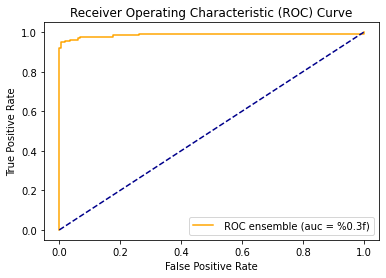

In [80]:
plot_roc_curve(fpr,tpr)